In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Análise exploratória.

In [4]:
df = pd.read_csv("olist_order_reviews_dataset.csv.zip")
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [5]:
# Count the number of null values in each column
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [6]:
# We drop the rows where review_comment_message is null, as this is the main column for the analysis
df = df.dropna(subset=['review_comment_message'])

print(df.shape)
df.isnull().sum()

(40977, 7)


review_id                      0
order_id                       0
review_score                   0
review_comment_title       31138
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [10]:
def satisfaction(x):
    if x > 3:
        return "satisfied"
    elif x == 3:
        return "neutral"
    else:
        return "not satisfied"


# The review_score column is the target column, but its values are not continuous, so we convert them to labels
df["review_satisfaction"] = df["review_score"].apply(satisfaction)
df

/tmp/ipykernel_8113/2342810565.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_satisfaction"] = df["review_score"].apply(satisfaction)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_satisfaction
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,satisfied
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,satisfied
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,satisfied
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,satisfied
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,satisfied
...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,satisfied
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,satisfied
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,neutral
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,satisfied


In [11]:
df["review_satisfaction"].value_counts()

satisfied        26530
not satisfied    10890
neutral           3557
Name: review_satisfaction, dtype: int64

In [12]:
# download from https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt
# and save as stopwords_ptbr.txt
with open("stopwords_ptbr.txt", "r") as f:
    stopwords = f.readlines()
stopwords = list(map(lambda x: x.strip().replace("\n", ""), stopwords))
stopwords[1:10]

['a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para']

In [13]:
from sklearn.utils import resample

# Separate the indie songs from the other genres
satisfied = df[df["review_satisfaction"] == 'satisfied']
other = df[df['review_satisfaction'] != 'satisfied']



# Undersample the indie songs
n_samples = len(other)
satisfied_undersampled = resample(satisfied, replace=False, n_samples=n_samples, random_state=42)

# Concatenate the undersampled indie songs and other genres
df_balanced = pd.concat([satisfied_undersampled, other])
df_balanced["review_satisfaction"].value_counts()

satisfied        14447
not satisfied    10890
neutral           3557
Name: review_satisfaction, dtype: int64

In [14]:
X = df["review_comment_message"].to_numpy()
# for i in tqdm(range(len(X))):
#     X[i] = " ".join([lemmatizer.lemmatize(word) for word in X[i].split(" ")])
Y = df["review_satisfaction"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

classificador = Pipeline(
    [
        ('meu_vetorizador', CountVectorizer(stop_words=stopwords)),
        ('meu_classificador', LogisticRegression(penalty='l1', solver='saga', max_iter=10_000))
    ]
)

classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.8376443793720514


In [15]:
import joblib
joblib.dump(classificador, 'classificador_v2.joblib')

['classificador.joblib']

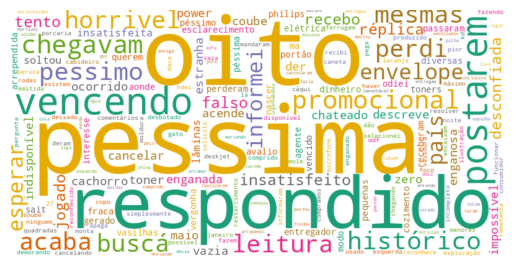

In [36]:
from wordcloud import WordCloud

feature_names = classificador["meu_vetorizador"].get_feature_names_out()
coefs = classificador["meu_classificador"].coef_[1]

word_weights = dict(zip(feature_names, coefs))

wordcloud = WordCloud(
    width=800, height=400, 
    background_color="white", 
    colormap="Dark2", max_font_size=150,
    random_state=42
).generate_from_frequencies(word_weights)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.png", dpi=300)
plt.show()

(3, 14207)


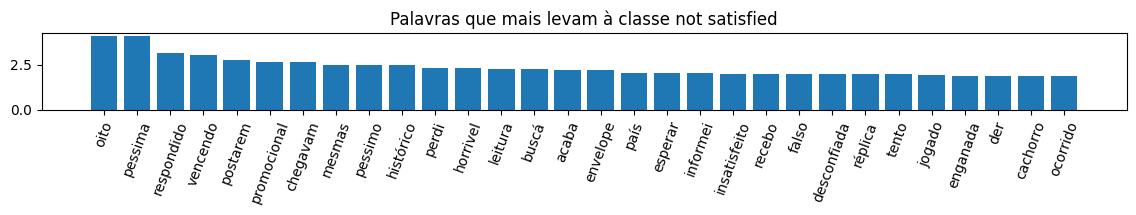

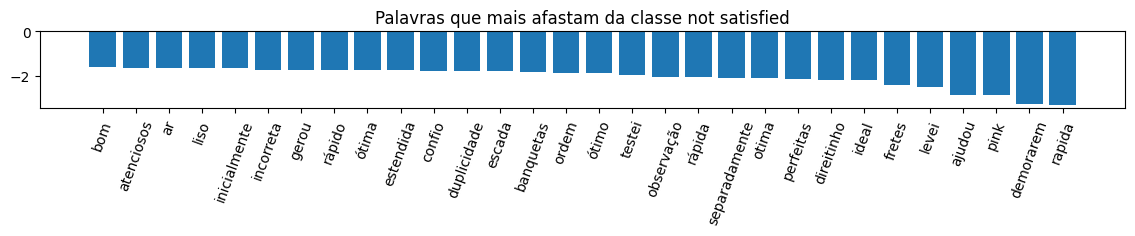

In [17]:

vocabulario = classificador['meu_vetorizador'].vocabulary_
pesos = classificador['meu_classificador'].coef_
print(pesos.shape)

classe_alvo = 1
classe_alvo_str = classificador.classes_[classe_alvo]

palavras_e_pesos = []
for palavra in vocabulario.keys():
    j = vocabulario[palavra]
    coeficiente = pesos[classe_alvo, j]
    palavras_e_pesos.append( (coeficiente, palavra) )

tuplas_ordenadas = sorted(palavras_e_pesos, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,1))
plt.title('Palavras que mais levam à classe ' + classe_alvo_str)
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.show()

eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,1))
plt.title('Palavras que mais afastam da classe ' + classe_alvo_str)
plt.bar(eixo_x[-n_palavras:], contagens[-n_palavras:])
plt.xticks(eixo_x[-n_palavras:], palavras[-n_palavras:], rotation=70)
plt.show()